In [1]:
# data science libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from collections import Counter

# loading linear algorithms
from sklearn.linear_model import LogisticRegression

# tree based algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

# machine learning processing and metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score

In [2]:
# pandas display options
pd.set_option('display.max_columns', None)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_rows", None)

In [3]:
#read in CSV
df = pd.read_csv('Imputed_Data.csv')
df.head()

,Unnamed: 0,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,Renal failure,COPD,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2,Urine output,hematocrit,RBC,MCH,MCHC,MCV,RDW,Leucocyte,Platelets,Neutrophils,Basophils,Lymphocyte,PT,INR,NT-proBNP,Creatine kinase,Creatinine,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF,Comorbidities
0,0,1,125047,0.0,72,1,37.588179,0,0,0,1,1,0,1,1,0,68.837838,155.866667,68.333333,16.621622,36.714286,98.394737,2155.0,26.272727,2.960000,28.250000,31.520000,89.900,16.220000,7.650000,305.100,74.650000,0.400000,13.300000,10.600000,1.000000,1956.0,148.000000,1.958333,50.000000,114.636364,4.816667,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55,4.0
1,1,1,139812,0.0,75,2,30.188278,0,0,0,0,1,0,0,0,1,101.370370,140.000000,65.000000,20.851852,36.682540,96.923077,1425.0,30.780000,3.138000,31.060000,31.660000,98.200,14.260000,12.740000,246.400,80.115592,0.405685,12.232717,17.486404,1.626064,2384.0,60.600000,1.122222,20.333333,147.500000,4.450000,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55,2.0
2,2,1,109787,0.0,83,2,26.572634,0,0,0,0,1,0,0,1,0,72.318182,135.333333,61.375000,23.640000,36.453704,95.291667,2425.0,27.700000,2.620000,34.320000,31.300000,109.800,23.820000,5.480000,204.200,68.100000,0.550000,24.500000,11.275000,0.950000,4081.0,16.000000,1.871429,33.857143,149.000000,5.825000,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35,2.0
3,3,1,130587,0.0,43,2,83.264629,0,0,0,0,0,0,0,0,0,94.500000,126.400000,73.200000,21.857143,36.287037,93.846154,8760.0,36.637500,4.277500,26.062500,30.412500,85.625,17.037500,8.225000,216.375,81.800000,0.150000,14.500000,27.066667,2.666667,668.0,85.000000,0.585714,15.285714,128.250000,4.386667,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55,0.0
4,4,1,138290,0.0,75,2,31.824842,1,0,0,0,1,0,0,1,1,67.920000,156.560000,58.120000,21.360000,36.761905,99.280000,4455.0,29.933333,3.286667,30.666667,33.666667,91.000,16.266667,8.833333,251.000,80.115592,0.405685,12.232717,17.486404,1.626064,30802.0,111.666667,1.950000,43.000000,145.750000,4.783333,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55,4.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1176 non-null   int64  
 1   group                     1176 non-null   int64  
 2   ID                        1176 non-null   int64  
 3   outcome                   1176 non-null   float64
 4   age                       1176 non-null   int64  
 5   gendera                   1176 non-null   int64  
 6   BMI                       1176 non-null   float64
 7   hypertensive              1176 non-null   int64  
 8   atrialfibrillation        1176 non-null   int64  
 9   CHD with no MI            1176 non-null   int64  
 10  diabetes                  1176 non-null   int64  
 11  deficiencyanemias         1176 non-null   int64  
 12  depression                1176 non-null   int64  
 13  Hyperlipemia              1176 non-null   int64  
 14  Renal fa

In [5]:
df.columns

Index(['Unnamed: 0', 'group', 'ID', 'outcome', 'age', 'gendera', 'BMI',
       'hypertensive', 'atrialfibrillation', 'CHD with no MI', 'diabetes',
       'deficiencyanemias', 'depression', 'Hyperlipemia', 'Renal failure',
       'COPD', 'heart rate', 'Systolic blood pressure',
       'Diastolic blood pressure', 'Respiratory rate', 'temperature', 'SP O2',
       'Urine output', 'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW',
       'Leucocyte', 'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte',
       'PT', 'INR', 'NT-proBNP', 'Creatine kinase', 'Creatinine',
       'Urea nitrogen', 'glucose', 'Blood potassium', 'Blood sodium',
       'Blood calcium', 'Chloride', 'Anion gap', 'Magnesium ion', 'PH',
       'Bicarbonate', 'Lactic acid', 'PCO2', 'EF', 'Comorbidities'],
      dtype='object')

In [6]:
df.drop(['Unnamed: 0', 'group', 'ID', 'hypertensive', 'atrialfibrillation', 'CHD with no MI', 'diabetes',
       'deficiencyanemias', 'depression', 'Hyperlipemia', 'Renal failure',
       'COPD'],  axis=1, inplace=True)
df.head()

,outcome,age,gendera,BMI,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2,Urine output,hematocrit,RBC,MCH,MCHC,MCV,RDW,Leucocyte,Platelets,Neutrophils,Basophils,Lymphocyte,PT,INR,NT-proBNP,Creatine kinase,Creatinine,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF,Comorbidities
0,0.0,72,1,37.588179,68.837838,155.866667,68.333333,16.621622,36.714286,98.394737,2155.0,26.272727,2.960000,28.250000,31.520000,89.900,16.220000,7.650000,305.100,74.650000,0.400000,13.300000,10.600000,1.000000,1956.0,148.000000,1.958333,50.000000,114.636364,4.816667,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55,4.0
1,0.0,75,2,30.188278,101.370370,140.000000,65.000000,20.851852,36.682540,96.923077,1425.0,30.780000,3.138000,31.060000,31.660000,98.200,14.260000,12.740000,246.400,80.115592,0.405685,12.232717,17.486404,1.626064,2384.0,60.600000,1.122222,20.333333,147.500000,4.450000,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55,2.0
2,0.0,83,2,26.572634,72.318182,135.333333,61.375000,23.640000,36.453704,95.291667,2425.0,27.700000,2.620000,34.320000,31.300000,109.800,23.820000,5.480000,204.200,68.100000,0.550000,24.500000,11.275000,0.950000,4081.0,16.000000,1.871429,33.857143,149.000000,5.825000,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35,2.0
3,0.0,43,2,83.264629,94.500000,126.400000,73.200000,21.857143,36.287037,93.846154,8760.0,36.637500,4.277500,26.062500,30.412500,85.625,17.037500,8.225000,216.375,81.800000,0.150000,14.500000,27.066667,2.666667,668.0,85.000000,0.585714,15.285714,128.250000,4.386667,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55,0.0
4,0.0,75,2,31.824842,67.920000,156.560000,58.120000,21.360000,36.761905,99.280000,4455.0,29.933333,3.286667,30.666667,33.666667,91.000,16.266667,8.833333,251.000,80.115592,0.405685,12.232717,17.486404,1.626064,30802.0,111.666667,1.950000,43.000000,145.750000,4.783333,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55,4.0


In [7]:
df_sub = df[['outcome', 'Anion gap', 'Bicarbonate', 'Lactic acid', 'Leucocyte',
         'Urine output', 'RDW', 'INR', 'Comorbidities', 'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte']].copy()

In [8]:
# Create our features
X = df_sub.drop('outcome', axis=1)
y = df_sub['outcome']

In [9]:
def evaluateModel(model, X_train, y_train, X_test, y_test):
    # FIT THE MODEL
    model.fit(X_train, y_train)

    # EVALUATE the MODEL
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # PRINT the METRICS
    print("TRAINING SET")

    class_report_train = classification_report(y_train, train_preds)
    conf_matrix_train = confusion_matrix(y_train, train_preds)

    print(class_report_train)
    print(conf_matrix_train)

    # Score the prediction with MSE and R2
    mse_train = np.sqrt(mean_squared_error(y_train, train_preds))
    r2_train = r2_score(y_train, train_preds)
    mae_train = mean_absolute_error(y_train, train_preds)

    print(f"root mean squared error (RMSE): {mse_train}")
    print(f"R-squared (R2 ): {r2_train}")
    print(f"MAE {mae_train}")

    print()

    # PRINT the METRICS
    print("Testing SET")

    class_report_test = classification_report(y_test, test_preds)
    conf_matrix_test = confusion_matrix(y_test, test_preds)

    print(class_report_test)
    
    print(conf_matrix_test)

    # Score the prediction with MSE and R2
    mse_test = np.sqrt(mean_squared_error(y_test, test_preds))
    r2_test = r2_score(y_test, test_preds)
    mae_test = mean_absolute_error(y_test, test_preds)

    print(f"root mean squared error (RMSE): {mse_test}")
    print(f"R-squared (R2 ): {r2_test}")
    print(f"MAE {mae_test}")
    
    print()
    
    # Calculate the accuracy score
    y_pred_model = model.predict(X_test)
    accuracy_score_model = accuracy_score(y_test, y_pred_model)
    
    print(f"Accuracy score: {accuracy_score_model}")
    
    print()
    
    # Creates the Roc Curve
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    plt.figure(figsize=(10,6))
    plt.plot(fpr,tpr,label="auc="+str(auc))
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve Test Set")
    plt.legend(loc=4)
    plt.show()
    
    return(model)

In [10]:
# Use the Sklearn `train_test_split()` function to split the data into training and testing data
X_train_old, X_test, y_train_old, y_test = train_test_split(X, y, random_state=42)

print(len(X_train_old) / len(X))
print(len(X_test) / len(X))

0.75
0.25


In [11]:
# Resample the training data with SMOTEENN
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_train, y_train = smote_enn.fit_resample(X_train_old, y_train_old)
Counter(y_train)

Counter({0.0: 338, 1.0: 514})

In [12]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

TRAINING SET
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       338
         1.0       1.00      1.00      1.00       514

    accuracy                           1.00       852
   macro avg       1.00      1.00      1.00       852
weighted avg       1.00      1.00      1.00       852

[[338   0]
 [  0 514]]
root mean squared error (RMSE): 0.0
R-squared (R2 ): 1.0
MAE 0.0

Testing SET
              precision    recall  f1-score   support

         0.0       0.92      0.77      0.84       250
         1.0       0.33      0.64      0.43        44

    accuracy                           0.75       294
   macro avg       0.62      0.70      0.63       294
weighted avg       0.83      0.75      0.78       294

[[192  58]
 [ 16  28]]
root mean squared error (RMSE): 0.5016977977548923
R-squared (R2 ): -0.9778181818181815
MAE 0.25170068027210885

Accuracy score: 0.7482993197278912



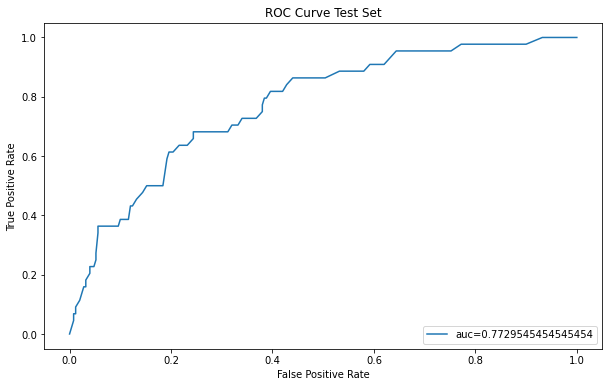

In [13]:
et = ExtraTreesClassifier(random_state=42)
et = evaluateModel(et, X_train, y_train, X_test, y_test)